### Мемоизация

Чтобы сделать это хоть сколько-нибудь эффективным, нужно избежать слишком большого числа пересчетов оставшейся части слова. 

Это можно сделать или с помощью динамического программирования или с помощью мемоизации aka кэширования

Пример того, как быстро работает код в случае рекурсивного подхода к расчету некоторой величины

Иллюстрацию того, что мемоизация - суперполезная штука, можно произвести на примере расчета чисел Фибоначчи.

In [2]:
def memo(f):
    "Запомнить результаты исполнения функции f, чьи аргументы args должны быть хешируемыми."
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo

расчет некоторого числа фиббоначчи с применением мемоизации

In [3]:
import time
@memo
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

# Какое число мы хотим посчитать
x = 40

t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
0.0020231620292179286


**без мемоизации(кеширования)**

In [4]:
import time

def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

# Какое число мы хотим посчитать
x = 40

t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
56.24106870099786


#### разница во времени расчетов отличается колоссально!

все дело в том, что во втором случае рекурсивный метод расчета числа вынуждает алгоритм повторять снова и снова расчет некоторых чисел, которые уже были посчитаны ранее

а если кэшировать результаты рекурсивных расчетов, то мы уже будем помнить те числа последовательности, которые уже считали в одну из итераций

In [5]:
# еще один способ применить мемоизацию для поиска числа фибоначчи

def fib(n):
    cache = {1: 1, 2: 1}            # создаем кеш, куда будем складывать уже вычисленные числа фибоначчи
    def fib_rec(n):
        result = cache.get(n)       # если искомое число уже в кэше, то функция сразу вернет его
        if result is None:          # а если get словаря вернет None (по умолчанию), то запускается расчет
            result = fib_rec(n - 2) + fib_rec(n - 1)
            cache[n] = result       # и в словарь кэша добавляется новый элемент
        return result
    return fib_rec(n)

fib(40)

102334155

In [1]:
# фисло фибоначчи с использованием рекурсии анонимных функций (lambda)

cache = {1: 1, 2: 1}

fib = lambda x, cache: cache[x] if x in cache else cache.setdefault(x, fib(x - 1, cache) + fib(x - 2, cache))

for i in range(1, 101):
    print(f'Числом Фибоначчи номер {i} является {fib(i, cache)}')

Числом Фибоначчи номер 1 является 1
Числом Фибоначчи номер 2 является 1
Числом Фибоначчи номер 3 является 2
Числом Фибоначчи номер 4 является 3
Числом Фибоначчи номер 5 является 5
Числом Фибоначчи номер 6 является 8
Числом Фибоначчи номер 7 является 13
Числом Фибоначчи номер 8 является 21
Числом Фибоначчи номер 9 является 34
Числом Фибоначчи номер 10 является 55
Числом Фибоначчи номер 11 является 89
Числом Фибоначчи номер 12 является 144
Числом Фибоначчи номер 13 является 233
Числом Фибоначчи номер 14 является 377
Числом Фибоначчи номер 15 является 610
Числом Фибоначчи номер 16 является 987
Числом Фибоначчи номер 17 является 1597
Числом Фибоначчи номер 18 является 2584
Числом Фибоначчи номер 19 является 4181
Числом Фибоначчи номер 20 является 6765
Числом Фибоначчи номер 21 является 10946
Числом Фибоначчи номер 22 является 17711
Числом Фибоначчи номер 23 является 28657
Числом Фибоначчи номер 24 является 46368
Числом Фибоначчи номер 25 является 75025
Числом Фибоначчи номер 26 является 12

In [4]:
# использование мемоизации для анонимных функций (кэширование)
from functools import lru_cache
fib = lru_cache()(lambda n: 1 if n<=2 else fib(n-1) + fib(n-2))

fib(97)

83621143489848422977

### Beegeek
https://stepik.org/lesson/751476/step/12?unit=753330

Кэширование – это способ оптимизации хранения данных, при котором операции с данными производятся эффективнее.

Мемоизация — это разновидность кэширования. Обычно под кэшированием понимают довольно широкий набор способов сохранения чего-либо для последующего использования. Мемоизация же означает кэширование возвращаемых значений функций.

Примечание: нужно быть осторожным с мемоизацией функций, которые принимают **ИЗМЕНЯЕМЫЕ** типы данных в качестве аргументов. Встроенный декоратор lru_cache **не позволяет работать с нехэшируемыми объектами**, так как за кулисами использует словарь.

Примечание . Все алгоритмы кэширования доступны в модуле cachetools по https://github.com/tkem/cachetools/.

In [ ]:
# шаблон декоратора, мемоизирующего любую функцию

import functools

def cached(func):
    cache = {}

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        key = args + tuple(kwargs.items())
        result = cache.get(key)
        if result is None:
            result = func(*args, **kwargs)
            cache[key] = result
        return result
    return wrapper

В этой простой реализации мемоизации есть очевидная проблема: содержимое словаря cache будет неограниченно расти при каждом вызове декорируемой функции с новыми аргументами.

Для решения такого рода проблемы существуют различные стратегии кэширования.

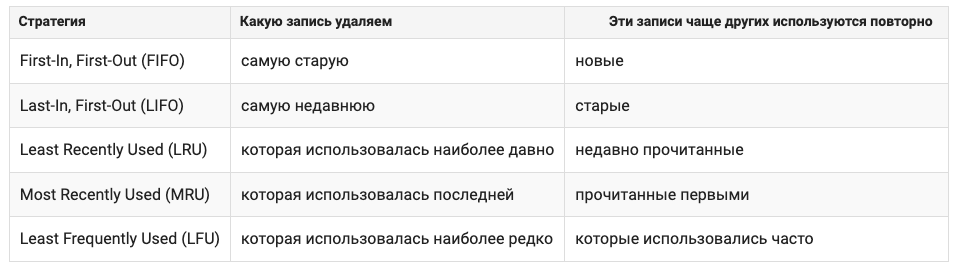

Стратегия LRU предполагает: чем позже использовался объект, тем больше вероятность, что он понадобится в будущем. Алгоритм сохраняет такой объект в кэше в течение максимально длительного времени. Кэш, реализованный посредством стратегии LRU, упорядочивает элементы в порядке их использования. Каждый раз, когда мы обращаемся к записи, алгоритм LRU перемещает ее в верхнюю часть кэша. Таким образом, алгоритм может быстро определить запись, которая дольше всех не использовалась, проверив конец списка.

### Декоратор lru_cache
если использовалась давно - нахрен ее из кэша

В модуле functools уже реализован декоратор lru_cache, дающий возможность кэшировать результат вычисления функции, используя стратегию Least Recently Used. Это простой, но мощный метод, который позволяет использовать в коде возможности кэширования.

In [3]:
from functools import lru_cache

@lru_cache          # начиная с 3.8 version можно не ставить скобки в случае отсутствия аргументов у декоратора кэширования
def fibonacci(n):
    if n <= 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)
    


In [4]:
fibonacci(40)

102334155

Аргументы декоратора кэширования lru-cache
1) maxsize - по умолчанию 128 (если None - будет расти без ограничений) - для размера кэша
2) typed - булево значение, указывается для понимания как рассматривать объекты для кэширования

Если для typed задано значение True, то аргументы функций разных типов будут кэшироваться отдельно. Например, f(3) и f(3.0) будут рассматриваться как отдельные вызовы с разными результатами. Если для typed задано значение False, то вызовы будут рассматриваться как одинаковые.

In [6]:
from functools import lru_cache

@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)

print(concat('beegeek', 4))
print(concat('beegeek', 5.0))
print(concat('beegeek', 4.0))   # возьмет значение из кэша , рассчитанное выше

beegeek 4
beegeek 5.0
beegeek 4


In [7]:
from functools import lru_cache

@lru_cache(typed=True)
def concat(text, num):
    return text + ' ' + str(num)

print(concat('beegeek', 4))
print(concat('beegeek', 5.0))
print(concat('beegeek', 4.0))       # закэшируется каждый результат вызова функции

beegeek 4
beegeek 5.0
beegeek 4.0


In [9]:
from functools import lru_cache

@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)

print(concat('beegeek', 1))
print(concat('beegeek', 1.0))
print(concat('beegeek', True))
print(concat('beegeek', 4.0))
print(concat('beegeek', 5))

print(concat.cache_info())  # вернет информацию о состоянии кэша
# количество взятых из кэша элементов при каждом новом вызове функции 
# количество вычисленных значений, а не взятых из кэша 
# размер кэша 
# текущая заполненность кэша

concat.cache_clear()            # очищает кэш
print(concat.cache_info())



beegeek 1
beegeek 1
beegeek 1
beegeek 4.0
beegeek 5
CacheInfo(hits=2, misses=3, maxsize=128, currsize=3)
CacheInfo(hits=0, misses=0, maxsize=128, currsize=0)


In [12]:
# вот тут наглядно о работе кода кэша https://stepik.org/lesson/751476/step/19?discussion=6338581&unit=753330

from functools import lru_cache

@lru_cache()
def add_one(number):
    print(number + 1, end=' ')
    
numbers = [1, 2, 3, 1, 3, 4, 4, 1]

for i in numbers:
    add_one(i)

add_one.cache_info()

2 3 4 5 

CacheInfo(hits=4, misses=4, maxsize=128, currsize=4)

In [13]:
def add_one(number):
    print(number + 1, end=' ')
    
numbers = [1, 2, 3, 1, 3, 4, 4, 1]

for i in numbers:
    add_one(i)

2 3 4 2 4 5 5 2 

### Задачи на мемоизацию

        Дима решил выучить английский алфавит, и чтобы изучение шло быстрее, он придумал упражнение: он берет произвольное английское слово и расставляет в нем все буквы в лексикографическом порядке. Иногда Дима берет слова повторно, так как не помнит, брал ли их раньше.

        Напишите программу, которая принимает на вход произвольное количество английских слов и в каждом расставляет буквы в лексикографическом порядке.

In [ ]:
from functools import lru_cache
from sys import stdin

@lru_cache
def sorted_words(word):
    return ''.join(sorted(word))

print(*[sorted_words(word.strip()) for word in stdin.readlines()], sep='\n')

        Дима любит учиться, но не любит получать низкие оценки, больше всего его огорчают двойки. Поэтому, когда Дима добирается до квартиры по лестнице, он поднимается исключительно на одну, три или четыре ступени, но не на две.

        Реализуйте функцию ways(), которая принимает один аргумент:

        n — натуральное число (n≤ 100)
        Функция должна возвращать единственное число — количество способов, которыми можно забраться на n-ую ступень. Путь начинается с первой ступени, подниматься можно исключительно на одну, три или четыре ступени.

In [1]:
import functools, time 

# декоратор подсчета времени работы функции
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        val = func(*args, **kwargs)
        end = time.perf_counter()
        work_time = end - start
        print(f'Время выполнения {func.__name__}: {round(work_time, 4)} сек.')
        return val
    return wrapper

@timer
def ways_rec(n):
    """ рекурсивная функция, которая считает количество вариантов попасть на n ступеньку , 
    имея возможность шагать на 1, 3 и 4 ступеньки за раз"""
    cache = {0:1, 1:1, 2:1, 3:1, 4:2}
    def temp(n):
        result = cache.get(n)
        if result is None:
            result = temp(n-1) + temp(n-3) + temp(n-4)
            cache[n] = result
        return result
    return temp(n)



@timer
def ways_din(n):
    """ функция динамического программирования, которая считает количество вариантов попасть на n ступеньку , 
    имея возможность шагать на 1, 3 и 4 ступеньки за раз """
    if n < 5: return (1,1,1,1,2)[n]
    
    else:
        dp = [0] * (n+1)
        dp[0] = dp[1] = dp[2] =dp[3] = 1
        dp[4] = 2
        
        for i in range(5, n+1):
            dp[i] = dp[i-1] + dp[i-3] + dp[i-4]
        return dp[n]


print(ways_rec(500))
print()


print(ways_din(500))

Время выполнения ways_rec: 0.001 сек.
100887593057066418230392292155377327989230367617830561023371358463025154196882692957626260961048402217375

Время выполнения ways_din: 0.0002 сек.
100887593057066418230392292155377327989230367617830561023371358463025154196882692957626260961048402217375


In [2]:
print(ways_din(1))

Время выполнения ways_din: 0.0 сек.
1
